In [220]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [344]:
df1=pd.read_excel(r"C:\Users\assis\Desktop\Notes\final_s.xlsx")

In [346]:
df1

,g_name,g_type,gender,age,min_t,status,fun,rating,review
0,Cricket,outdoor,m,25,1.0,win,1,4,Cricket is such an interesting sport that we e...
1,football,outdoor,m,20,0.5,loss,0,2,Football fails to capture my interest due to i...
2,football,outdoor,f,25,0.2,loss,0,3,Boring game
3,Cricket,outdoor,f,20,0.4,win,1,5,Interesting game
4,football,outdoor,f,30,0.2,loss,0,3,needs to follow the ball always
5,hide & seek,indoor,m,25,0.3,win,1,4,Hide and seek is an exciting and timeless game...
6,shuttle,indoor,m,30,0.3,loss,0,2,"The shuttle service was disappointing, plagued..."
7,Cricket,outdoor,f,20,0.5,win,1,4,Need to keep eye always on ball
8,hide & seek,indoor,m,30,0.2,loss,0,1,mindfull game
9,hide & seek,indoor,m,25,0.3,win,1,4,Hide and seek is an exciting and timeless game...


# Load Required Columns

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   g_name  11 non-null     object 
 1   g_type  11 non-null     object 
 2   gender  11 non-null     object 
 3   age     11 non-null     int64  
 4   min_t   11 non-null     float64
 5   status  11 non-null     object 
 6   fun     11 non-null     int64  
 7   rating  11 non-null     int64  
 8   review  11 non-null     object 
dtypes: float64(1), int64(3), object(5)
memory usage: 920.0+ bytes


In [224]:
df.sample()

,g_name,g_type,gender,age,min_t,status,fun,rating,review
7,Cricket,outdoor,f,20,0.5,win,1,4,Need to keep eye always on ball


In [225]:
selected_cols =['g_name', 'g_type', 'gender', 'age', 'min_t','rating','status']

In [226]:
df.columns

Index(['g_name', 'g_type', 'gender', 'age', 'min_t', 'status', 'fun', 'rating',
       'review'],
      dtype='object')

In [230]:
df=pd.read_excel(r"C:\Users\assis\Desktop\Notes\final_s.xlsx",usecols=selected_cols)

In [231]:
df

,g_name,g_type,gender,age,min_t,status,rating
0,Cricket,outdoor,m,25,1.0,win,4
1,football,outdoor,m,20,0.5,loss,2
2,football,outdoor,f,25,0.2,loss,3
3,Cricket,outdoor,f,20,0.4,win,5
4,football,outdoor,f,30,0.2,loss,3
5,hide & seek,indoor,m,25,0.3,win,4
6,shuttle,indoor,m,30,0.3,loss,2
7,Cricket,outdoor,f,20,0.5,win,4
8,hide & seek,indoor,m,30,0.2,loss,1
9,hide & seek,indoor,m,25,0.3,win,4


# Clean the Data

In [232]:
df1.isna().sum()

g_name    0
g_type    0
gender    0
age       0
min_t     0
status    0
rating    0
dtype: int64

Text(0.5, 1.0, 'Rating by Game Name')

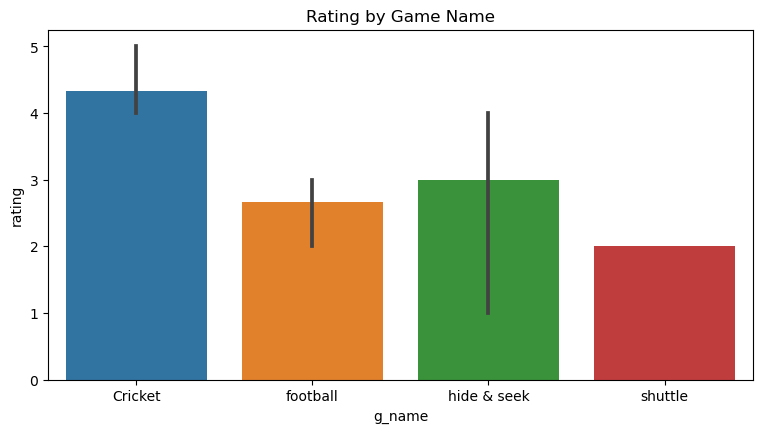

In [149]:
# Bar plot for rating
plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
sns.barplot(x='g_name', y='rating', data=df)
plt.title('Rating by Game Name')


Text(0.5, 1.0, 'Age vs Rating')

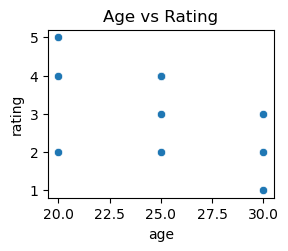

In [150]:
plt.subplot(2, 2, 2)
sns.scatterplot(x='age', y='rating', data=df)
plt.title('Age vs Rating')

Text(0.5, 1.0, 'Minimum Time by Gender')

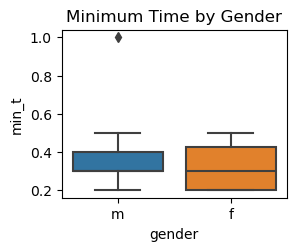

In [151]:
plt.subplot(2, 2, 3)
sns.boxplot(x='gender', y='min_t', data=df)
plt.title('Minimum Time by Gender')


Text(0.5, 1.0, 'Status Count')

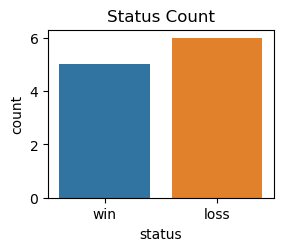

In [152]:
# Count plot for status
plt.subplot(2, 2, 4)
sns.countplot(x='status', data=df)
plt.title('Status Count')

# Split the Data

In [153]:
from sklearn.model_selection import train_test_split

In [233]:
train_val_df, test_df = train_test_split(df1,test_size=0.2,random_state=42)

In [234]:
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [283]:
df.columns

Index(['g_name', 'g_type', 'gender', 'age', 'min_t', 'status', 'rating'], dtype='object')

In [236]:
inputs=['g_name', 'g_type', 'gender', 'age', 'min_t', 'rating']

In [237]:
output='status'

In [284]:
train_inputs = train_df[inputs]
train_target = train_df[output]

In [285]:
val_inputs = val_df[inputs]
val_target = val_df[output]

In [286]:
test_inputs = test_df[inputs]
test_target = test_df[output]

# Preprocess the Data

## Encoding the Data

In [287]:
df.select_dtypes('object').columns

Index(['g_name', 'g_type', 'gender', 'status'], dtype='object')

In [288]:
categoricals = list(df1.select_dtypes('object').columns)

In [289]:
categoricals.remove('status')

In [290]:
categoricals

['g_name', 'g_type', 'gender']

In [291]:
df1[categoricals]

,g_name,g_type,gender
0,Cricket,outdoor,m
1,football,outdoor,m
2,football,outdoor,f
3,Cricket,outdoor,f
4,football,outdoor,f
5,hide & seek,indoor,m
6,shuttle,indoor,m
7,Cricket,outdoor,f
8,hide & seek,indoor,m
9,hide & seek,indoor,m


In [292]:
from sklearn.preprocessing import OneHotEncoder

In [293]:
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')

In [294]:
encoder.fit(df[categoricals])

C:\ProgramData\anaconda3\envs\Jupyter notebook\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [295]:
encoded_cols = list(encoder.get_feature_names_out(categoricals))

encoded_cols

['g_name_Cricket',
 'g_name_football',
 'g_name_hide & seek',
 'g_name_shuttle',
 'g_type_indoor',
 'g_type_outdoor',
 'gender_f',
 'gender_m']

In [296]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categoricals])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categoricals])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categoricals])

In [297]:
train_inputs[encoded_cols]

,g_name_Cricket,g_name_football,g_name_hide & seek,g_name_shuttle,g_type_indoor,g_type_outdoor,gender_f,gender_m
10,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
6,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
8,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


# Fit the Data

In [298]:
from sklearn.linear_model import LogisticRegression

In [299]:
log_model = LogisticRegression()

In [314]:
numerics = list(df.select_dtypes(np.number).columns)

In [315]:
numerics

['age', 'min_t', 'rating']

In [316]:
train_inputs[encoded_cols + numerics]

,g_name_Cricket,g_name_football,g_name_hide & seek,g_name_shuttle,g_type_indoor,g_type_outdoor,gender_f,gender_m,age,min_t,rating
10,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,25,0.3,2
6,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,30,0.3,2
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,20,0.5,2
4,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,30,0.2,3
8,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,30,0.2,1
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,20,0.4,5


In [317]:
log_model.fit(train_inputs[numerics + encoded_cols], train_target)

LogisticRegression()

In [318]:
train_inputs[numerics + encoded_cols]

,age,min_t,rating,g_name_Cricket,g_name_football,g_name_hide & seek,g_name_shuttle,g_type_indoor,g_type_outdoor,gender_f,gender_m
10,25,0.3,2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
6,30,0.3,2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,20,0.5,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,30,0.2,3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
8,30,0.2,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,20,0.4,5,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [319]:
train_target

10    loss
6     loss
1     loss
4     loss
8     loss
3      win
Name: status, dtype: object

In [320]:
train_preds = log_model.predict(train_inputs[numerics + encoded_cols])

In [321]:
val_preds = log_model.predict(val_inputs[numerics + encoded_cols])

In [263]:
from sklearn.metrics import accuracy_score

In [264]:
accuracy_score(train_target, train_preds)

1.0

In [265]:
accuracy_score(val_target, val_preds)

1.0

In [267]:
train_target.value_counts()

status
loss    5
win     1
Name: count, dtype: int64

In [268]:
from sklearn.metrics import f1_score

In [269]:
pos_label = 'win'

In [270]:
f1_score(train_target, train_preds,pos_label=pos_label)

1.0

In [271]:
f1_score(val_target, val_preds,pos_label=pos_label)

1.0

In [272]:
train_inputs

,g_name,g_type,gender,age,min_t,rating,g_name_Cricket,g_name_football,g_name_hide & seek,g_name_shuttle,g_type_indoor,g_type_outdoor,gender_f,gender_m
10,shuttle,indoor,m,25,0.3,2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
6,shuttle,indoor,m,30,0.3,2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,football,outdoor,m,20,0.5,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,football,outdoor,f,30,0.2,3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
8,hide & seek,indoor,m,30,0.2,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,Cricket,outdoor,f,20,0.4,5,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [273]:
train_preds

array(['loss', 'loss', 'loss', 'loss', 'loss', 'win'], dtype=object)

In [274]:
val_preds

array(['loss', 'win'], dtype=object)

In [361]:
n=train_inputs
n

,g_name,g_type,gender,age,min_t,rating,g_name_Cricket,g_name_football,g_name_hide & seek,g_name_shuttle,g_type_indoor,g_type_outdoor,gender_f,gender_m
10,shuttle,indoor,m,25,0.3,2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
6,shuttle,indoor,m,30,0.3,2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,football,outdoor,m,20,0.5,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,football,outdoor,f,30,0.2,3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
8,hide & seek,indoor,m,30,0.2,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,Cricket,outdoor,f,20,0.4,5,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


# Decision Tree

In [325]:
from sklearn.tree import DecisionTreeClassifier

In [326]:
model = DecisionTreeClassifier(random_state=42,class_weight='balanced')

In [327]:
model.fit(train_inputs[numerics + encoded_cols],train_target)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [331]:
train_preds = model.predict(train_inputs[numerics + encoded_cols])
val_preds = model.predict(val_inputs[numerics + encoded_cols])

In [332]:
f1_score(train_target, train_preds,pos_label=pos_label)

1.0

In [333]:
f1_score(val_target, val_preds,pos_label=pos_label)

1.0

In [334]:
importance_df = pd.DataFrame({
    'feature': train_inputs[numerics + encoded_cols].columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [335]:
importance_df.head(10)

,feature,importance
3,g_name_Cricket,1.0
0,age,0.0
1,min_t,0.0
2,rating,0.0
4,g_name_football,0.0
5,g_name_hide & seek,0.0
6,g_name_shuttle,0.0
7,g_type_indoor,0.0
8,g_type_outdoor,0.0
9,gender_f,0.0


In [336]:
import seaborn as sns

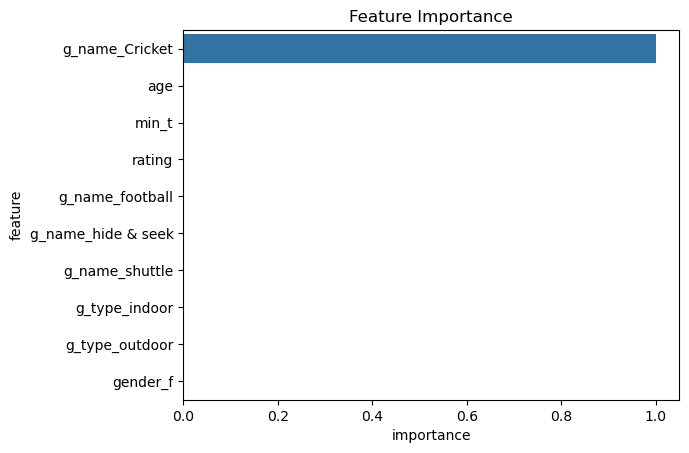

In [337]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

# Here give the output manually u will the whether the team win or loose

In [ ]:
new_data = {
    
    'age': [25, 30, 20, 30],
    'min_t': [0.3, 0.3, 0.5, 0.2],
    'rating': [2, 2, 2, 3],
    'g_name_Cricket': [0.0, 0.0, 0.0, 0.0],
    'g_name_football': [0.0, 0.0, 1.0, 1.0],
    'g_name_hide & seek': [0.0, 0.0, 0.0, 0.0],
    'g_name_shuttle': [1.0, 1.0, 0.0, 0.0],
    'g_type_indoor': [1.0, 1.0, 0.0, 0.0],
    'g_type_outdoor': [0.0, 0.0, 1.0, 1.0],
    'gender_f': [0.0, 0.0, 1.0, 1.0],
    'gender_m': [1.0, 1.0, 0.0, 0.0]

}


input_df = pd.DataFrame(new_data)

In [371]:
s_preds = log_model.predict(input_df)

In [372]:
s_preds

array(['loss', 'loss', 'loss', 'loss'], dtype=object)

# NLP Part On The Review Column

In [203]:
# import libraries
import pandas as pd

import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer


# download nltk corpus (first time only)
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\assis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\assis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\assis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\assis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\assis\AppData\Roaming\nltk_data...
[nltk_data]    | 

[nltk_data]    |   Package moses_sample is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\assis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\assis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\assis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\assis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\assis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to

[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\assis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\assis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\Users\assis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     C:\Users\assis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_tagset is already up-to-date!
[nltk_data]    | Downloading package universal_treebanks_v20 to
[nltk_data]    |     C:\Users\assis\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_treebanks_v20 is already up-to-
[nltk_data]    |       date!

True

In [347]:
df1.dtypes

g_name     object
g_type     object
gender     object
age         int64
min_t     float64
status     object
fun         int64
rating      int64
review     object
dtype: object

In [349]:
df1[['review']]

,review
0,Cricket is such an interesting sport that we e...
1,Football fails to capture my interest due to i...
2,Boring game
3,Interesting game
4,needs to follow the ball always
5,Hide and seek is an exciting and timeless game...
6,"The shuttle service was disappointing, plagued..."
7,Need to keep eye always on ball
8,mindfull game
9,Hide and seek is an exciting and timeless game...


# Step 2 - Preprocess text

In [350]:
def preprocess_text(text):

    # Tokenize the text

    tokens = word_tokenize(text.lower())
    # Remove stop words

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

# apply the function df


In [351]:
df1['review'] = df1['review'].apply(preprocess_text)

In [352]:
df1[['review']]

,review
0,cricket interesting sport easily lose track ti...
1,football fails capture interest due repetitive...
2,boring game
3,interesting game
4,need follow ball always
5,hide seek exciting timeless game spark creativ...
6,"shuttle service disappointing , plagued freque..."
7,need keep eye always ball
8,mindfull game
9,hide seek exciting timeless game spark creativ...


# Step 3 - NLTK Sentiment Analyzer

In [353]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()

# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return sentiment

In [354]:
# apply get_sentiment function

df1['sentiment'] = df1['review'].apply(get_sentiment)

df1

,g_name,g_type,gender,age,min_t,status,fun,rating,review,sentiment
0,Cricket,outdoor,m,25,1.0,win,1,4,cricket interesting sport easily lose track ti...,1
1,football,outdoor,m,20,0.5,loss,0,2,football fails capture interest due repetitive...,1
2,football,outdoor,f,25,0.2,loss,0,3,boring game,0
3,Cricket,outdoor,f,20,0.4,win,1,5,interesting game,1
4,football,outdoor,f,30,0.2,loss,0,3,need follow ball always,0
5,hide & seek,indoor,m,25,0.3,win,1,4,hide seek exciting timeless game spark creativ...,1
6,shuttle,indoor,m,30,0.3,loss,0,2,"shuttle service disappointing , plagued freque...",0
7,Cricket,outdoor,f,20,0.5,win,1,4,need keep eye always ball,0
8,hide & seek,indoor,m,30,0.2,loss,0,1,mindfull game,0
9,hide & seek,indoor,m,25,0.3,win,1,4,hide seek exciting timeless game spark creativ...,1


# Step 4- Result

In [356]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(df1['fun'], df1['sentiment']))

[[5 1]
 [1 4]]


In [358]:
from sklearn.metrics import classification_report

print(classification_report(df1['fun'], df1['sentiment']))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.80      0.80      0.80         5

    accuracy                           0.82        11
   macro avg       0.82      0.82      0.82        11
weighted avg       0.82      0.82      0.82        11

